In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('M67.csv', sep=';') # J/A+A/382/899/table3 https://vizier.cds.unistra.fr/viz-bin/VizieR
raw

,Bmag,Vmag
0,13.68,13.17
1,15.45,14.83
2,11.16,9.94
3,14.32,13.73
4,15.54,14.78
...,...,...
984,,17.42
985,14.87,14.19
986,16.00,15.42
987,,NaN


In [3]:
data = raw.copy().replace(['     '], np.nan).dropna().astype(float)
data = data.rename(columns={'Vmag': 'V', 'Bmag': 'B'})
data

,B,V
0,13.68,13.17
1,15.45,14.83
2,11.16,9.94
3,14.32,13.73
4,15.54,14.78
...,...,...
981,15.26,14.70
982,16.52,15.66
983,16.66,15.86
985,14.87,14.19


In [4]:
R = 850.0 # pc
R0 = 10.0 # pc

data['B-V'] = data['B'] - data['V']
data['M_V'] = data['V'] - 5.0 * np.log10(R / R0)
data = data[['B-V', 'M_V']].copy()
data

,B-V,M_V
0,0.51,3.522905
1,0.62,5.182905
2,1.22,0.292905
3,0.59,4.082905
4,0.76,5.132905
...,...,...
981,0.56,5.052905
982,0.86,6.012905
983,0.80,6.212905
985,0.68,4.542905


In [5]:
data.to_csv('../../data/hr-M67.txt', sep='\t', index=False, float_format='%.4f')
!head ../../data/hr-M67.txt

B-V	M_V
0.5100	3.5229
0.6200	5.1829
1.2200	0.2929
0.5900	4.0829
0.7600	5.1329
0.4300	3.7629
0.6700	1.4929
0.5700	4.6829
0.6800	5.0029


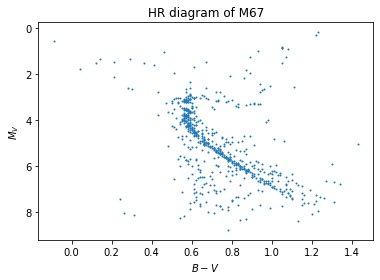

In [6]:
plt.scatter(data['B-V'], data['M_V'], s=1 )

plt.title('HR diagram of M67')
plt.xlabel('$B-V$')
plt.ylabel('$M_V$')
plt.gca().invert_yaxis()

plt.show()